# Will I get funded? Determining the Likelihood of Being Funded Using Kiva Loans
Group 4 - Daguman | Escano | Sagrit | Tanting
<hr>

Peer to peer lending (P2P) from microfinancing instituitions have developed to become an alternative source of funding to formal financial instituitions as the demand for micro-scale funding are increasing. It has become a movement for poverty alleviation to provide financial access for impoverished communities who have little to no access to financial services (Brau et al., 2004). P2P lending instituitions such as [Kiva Loans](https://www.kiva.org/) promote financial inclusivity that has been particularly beneficial for small businesses that need enough capital but lack collateral assets to apply for loans. Kiva Loans has allowed lenders from all over the world to loan to low-income, small, micro, and medium enterprises and people in need for funding in developing countries.

<br> 

## Problem Statement
Most low-income enterprises from developing countries resorted to micro-financing because of the limited access to finance. However, even if Kiva Loans exist, there is no guarantee that borrowers from these countries will get funded. Borrower characteristics are particularly considered by lenders before they provide a loan. This includes their purpose for borrowing funds, lending risks, lending terms, and others. As such, this project shall analyze for Kiva Loans in determining the likelihood whether borrowers will get funded or not.

<br> 

## Data Collection
The following libraries are used in data collection and data analysis in this project:

In [ ]:
#Libraries
import urllib
from bs4 import BeautifulSoup
import re
import random as rand
import pandas as pd
from urllib.request import urlopen
import requests
import bs4
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')
# sns.color_palette('Set2')

The following is the function to process each page and returns an array of values that were retrieved from the page.

In [ ]:
def processPage(soup):
  #Expired (Expired loans were partially funded loans)
  expired_data = str(soup.find_all('h2', class_= 'green-bolded inline'))
  if 'Expired' in expired_data:
    expired = 1
  else:
    expired = 0

  #Name (Name of the borrower)
  name = str(soup.find_all('h1', class_ = 'borrower-name')[0].text)

  #Loan Total Amount
  loan_data = str(soup.find_all('div', class_ = 'loan-total')[0].text)
  loan_data = loan_data.split('Total loan: ')[1]
  loan_amount = loan_data.replace('\n', '').replace('\t','').replace('$','')
    
  #Location Industry Type
  country_data = str(soup.find_all('a', class_ = 'black-underlined', href= '#country-section')[0].text)
  split_country_data = country_data.split(',')
  if (len(split_country_data) >= 2):
    region = split_country_data[0]
    country = split_country_data[-1]
  else:
    region = 'n/a'
    country = split_country_data[0]

  #Industry
  industry = str(soup.find_all('span', class_= 'typeName')[0].text)

  #Loan Length
  loan_length_data = str(soup.find_all('div', class_ = 'green-bolded')[1].text)
  loan_length = loan_length_data.split(' ')[0]

  #Partner Time on Kiva
  partner_time_data = str(soup.find_all('div', id = 'partner-time-on-kiva')[0].text)
  partner_time = partner_time_data.split(':')[1].replace(' ', '').replace('\n','').replace('\t','').replace('months','')

  #Partner Average Cost to Borrower
  cost_data = str(soup.find_all('div', id = 'partner-avg-cost-to-borrower')[0].text)
  borrower_average_cost = cost_data.split(':')[1].replace(' ', '').replace('\n','').replace('\t','').split('%')[0]

  #Partner Deliquency Rate
  deliquency_data = str(soup.find_all('div', id = 'partner-delinquency-rate')[0].text)
  deliquency_rate = deliquency_data.split(':')[1].replace(' ', '').replace('\n','').replace('\t','').split('%')[0]

  #Partner Default Rate
  default_data = str(soup.find_all('div', id = 'partner-default-rate')[0].text)
  default_rate = default_data.split(':')[1].replace(' ', '').replace('\n','').replace('\t','').split('%')[0]

  #Partner Profitability
  profitability_data = str(soup.find_all('div', id = 'partner-profitability')[0].text)
  profitability_rate = profitability_data.split(':')[1].replace(' ', '').replace('\n','').replace('\t','').split('%')[0]
  
  return [expired, name, loan_amount, region, country, industry, loan_length, partner_time, borrower_average_cost, deliquency_rate, default_rate, profitability_rate]

In [ ]:
df_entries = []
target_entries = 6000 # Number of loans we want to scrape
curr_id = 1900000 # Starting loan ID
step_size = 10 # Interval between loan IDs
entry_ctr = 0

while(entry_ctr < target_entries):
    # sample url: https://www.kiva.org/lend/2000500?minimal=false
    url = 'https://www.kiva.org/lend/' + str(curr_id) + '?minimal=false'
    res = requests.get(url)
    curr_id += step_size
    # Skip pages that no longer exist 
    if (res.url != url):
        continue
    soup = bs4.BeautifulSoup(res.text, 'lxml')
    entry = processPage(soup)
    df_entries.append(entry)
    entry_ctr += 1

column_names = ["Expired", "Borrower Name", "Loan Amount", "Region", "Country", "Industry", "Loan Length", "Partner Time With Kiva","Borrower Average Cost", "Partner Delinquency Rate", "Partner Default Rate", "Profitability Rate"]
df = pd.DataFrame(df_entries, columns=column_names)
df.head()

IndexError: list index out of range

In [ ]:
df = pd.read_csv('kiva_scraped_6000.csv')
len(df)

6000

In [ ]:
df.head(20)

,Unnamed: 0,Expired,Borrower Name,Loan Amount,Region,Country,Industry,Loan Length,Partner Time With Kiva,Borrower Average Cost,Partner Delinquency Rate,Partner Default Rate,Profitability Rate
0,0,0,Bettie,"1,375",Bombo,Uganda,Property,14,113,51.0,16.19,0.60,-3.1
1,1,0,Justine,275,Mityana,Uganda,Food,11,165,60.0,47.23,0.27,7.3
2,2,0,Lillian,825,Ibanda,Uganda,Livestock,14,113,51.0,16.19,0.60,-3.1
3,3,0,Winnie,175,Mityana,Uganda,Retail,9,165,60.0,47.23,0.27,7.3
4,4,0,Shein,825,Bombo,Uganda,Clothing Sales,6,113,51.0,16.19,0.60,-3.1
5,5,0,Musa,375,Kaduna,Nigeria,Primary/secondary school costs,14,102,18.0,0.00,0.00,-1.4
6,6,0,Liza,700,Concepcion,Philippines,Fishing,13,154,60.0,8.14,0.58,-7.7
7,7,0,Kasifa,700,Bombo,Uganda,General Store,14,113,51.0,16.19,0.60,-3.1
8,8,0,Maria,200,Mityana,Uganda,Restaurant,9,165,60.0,47.23,0.27,7.3
9,9,0,Rhona Lee,150,Carmen,Philippines,Food,12,154,60.0,8.14,0.58,-7.7


## Exploratory Data Analysis

Data Dictionary of Kiva Dataset:
- Expired: A dummy variable where 1 if the loan is fully funded, 0 if otherwise.
- Loan Amount: The amount of loan being asked by the lendee
- Country: The country in which the lendee currently resides.
- Industry: The industry of the loan
- Loan Length: The duration of the loan
- Partner Time with Kiva: The number of days in which the lendee posted in Kiva
- Borrower Average Cost: Average cost of the the borrower
- Partner Delinquincy Rate: The delinquency rate refers to the percentage of loans that are past due of the partner.
- Partner Default Rate: The Partner default rate is the percentage of all outstanding loans that a lender has written off as unpaid after a prolonged period of missed payments.
- Profitability Rate: The rate at which a lender may profit from the loan.


The features in the data whole KIVA dataset is spearated into two groups based on its type: 
a.) Category columns
b.) Numerical columns 

In [ ]:
cat_cols = ["Expired", "Region", "Country", "Industry"]
num_cols = ["Loan Amount", "Loan Length", "Partner Time With Kiva","Borrower Average Cost", "Partner Delinquency Rate", "Partner Default Rate", "Profitability Rate"]

Using each of the numerical, the group uses histogram to determine which treatment the group will perform for the missing values in the dataset.

For numerical variables like Loan Amount, Loan Length, Partner Delinquincy Rate, and Partner Default Rate, most of the data points are skewed to the left in their histogram.

Borrower Average cost, Profitability rate, and Partner time with Kiva seemed to have centered data points. This information is relevant as well since our methodology involves around logistic regression. 

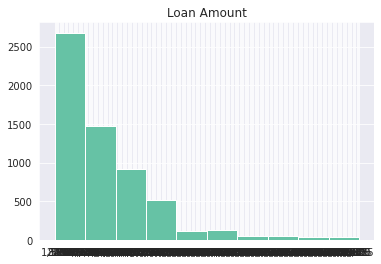

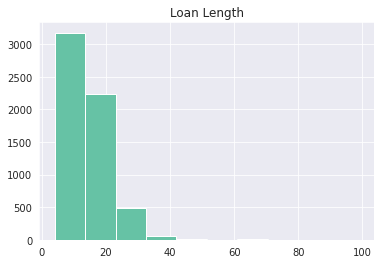

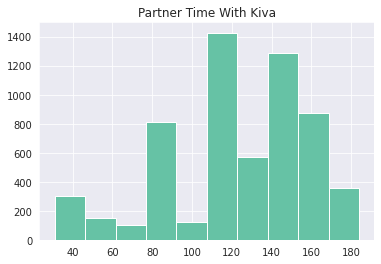

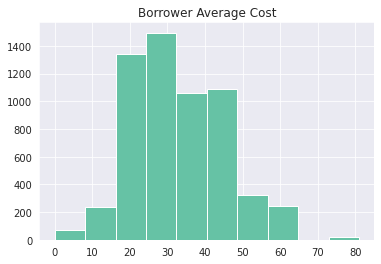

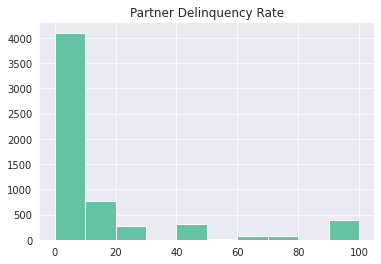

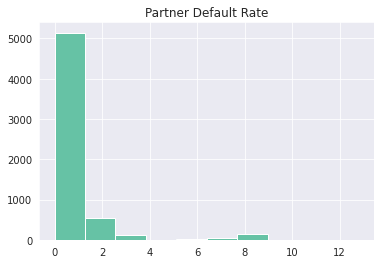

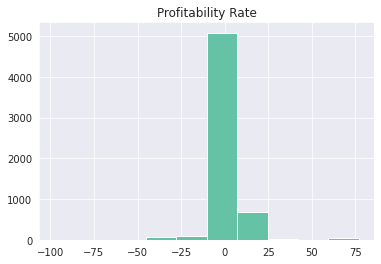

In [ ]:
# Visualize the numerical columns
for i in num_cols:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

For categorical variables, it is noticeable that most datapoints in the Expired feature are unexpired. For country, it is data points are usually in third-world countries like Uganda and Philippines. Lastly, the most count in the industry feature is retail.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


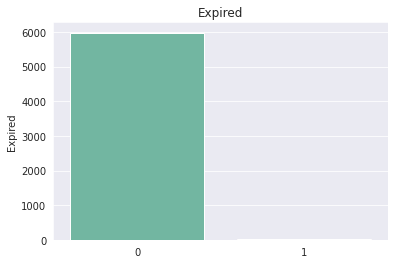

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


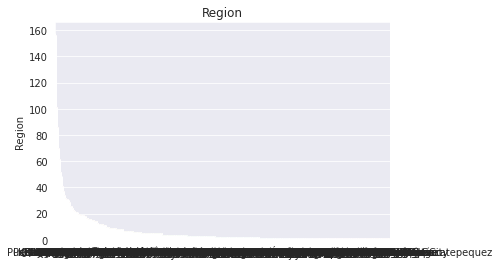

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


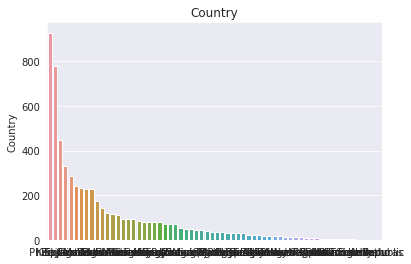

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


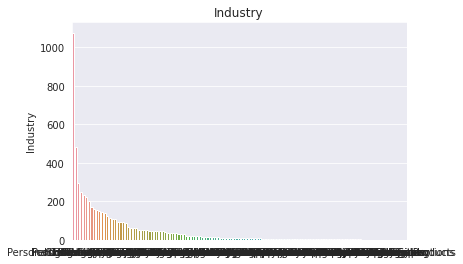

In [ ]:
# Visualize the categorical columns 
for i in cat_cols:
    sns.barplot(df[i].value_counts().index,df[i].value_counts()).set_title(i)
    plt.show()

## Data Preprocessing

In this section, we will be preprocessing our data by handling null values, scaling numerical columns, and performing one-hot encoding on the categorical columns. Before performing preprocessing, let us check if our data contains any null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                6000 non-null   int64  
 1   Expired                   6000 non-null   int64  
 2   Borrower Name             6000 non-null   object 
 3   Loan Amount               6000 non-null   object 
 4   Region                    5751 non-null   object 
 5   Country                   6000 non-null   object 
 6   Industry                  6000 non-null   object 
 7   Loan Length               6000 non-null   int64  
 8   Partner Time With Kiva    6000 non-null   int64  
 9   Borrower Average Cost     5891 non-null   float64
 10  Partner Delinquency Rate  6000 non-null   float64
 11  Partner Default Rate      6000 non-null   float64
 12  Profitability Rate        6000 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 609.5+ KB


We see that we have null values with the columns **Region** and **Borrower Average Cost**. In this case, since the null rows cover less than 10% of our total data, we can consider simply dropping these rows instead of imputing them. For **Region**, we will be dropping the entire column instead since there are more than 500 unique categorical values which might create too many columns when one-hot encoded. Instead, **Country** will be used as the geographical indicator of the loan. Alongside **Region** we will also be dropping the **Name** since it won't really contribute to knowing whether a loan will be funded or not.  

In [ ]:
drop_cols = ['Borrower Name', 'Region']
# Drop unneeded columns
df = df.drop(columns=drop_cols)

# Drop rows with null values
df = df.dropna()
len(df)

5891

Next, we will be performing scaling on the numerical values to get a better distribution for the data and reduce the impact of outliers in the data. However, before proceeding, we must first convert the **Loan Amount** column since it is currently an object.

In [ ]:
# The values are formatted with commas such as "1,296" so let's remove them 
df['Loan Amount'] = df['Loan Amount'].apply(lambda x: x.replace(',', ''))
# Convert it to numeric
df['Loan Amount'] = pd.to_numeric(df['Loan Amount'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_cols = ["Loan Amount", "Loan Length", "Partner Time With Kiva","Borrower Average Cost", "Partner Delinquency Rate", "Partner Default Rate", "Profitability Rate"]

# Initialize scaler
scaler = MinMaxScaler()
# Create scaled df
df_scaled = df.copy()

df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

Moving over to our categorical data, simply performing one-hot encoding on the data will produce a large amount of columns. However, we can instead take the top 10 value counts for each column and perform one-hot encoding on those columns since they already comprise majority of the data. 

In [ ]:
print("Number of unique values for Country: ", len(df_scaled['Country'].value_counts()))
print("Number of unique values for Industry: ", len(df_scaled['Industry'].value_counts()))
print("Number of rows in Top 10 countries: ", df_scaled['Country'].value_counts().head(10).sum())
print("Number of rows in Top 10 industries: ", df_scaled['Industry'].value_counts().head(10).sum())

Number of unique values for Country:  64
Number of unique values for Industry:  127
Number of rows in Top 10 countries:  3793
Number of rows in Top 10 industries:  3223


In [ ]:
# Perform one hot encoding 
# Get top 10 labels for countries and industries
top_countries = [x for x in df_scaled['Country'].value_counts().sort_values(ascending=False).head(10).index]
top_industries = [x for x in df_scaled['Industry'].value_counts().sort_values(ascending=False).head(10).index]

print("Top countries are: ", top_countries)
print("Top industries are: ", top_industries)

# Create country columns
for country in top_countries:
    df_scaled[country] = np.where(df_scaled['Country']==country,1,0)

# Create industry columns
for industry in top_industries:
    df_scaled[industry] = np.where(df_scaled['Industry']==industry,1,0)

# Drop the columns of Country and Industry since we've encoded them
drop_columns = ['Country', 'Industry']
df_scaled = df_scaled.drop(columns=drop_columns)

Top countries are:  [' Kenya', ' Philippines', ' Ecuador', ' Tajikistan', ' El Salvador', ' Cambodia', ' Uganda', ' Peru', ' Vietnam', ' Madagascar']
Top industries are:  ['Farming', 'Personal Housing Expenses', 'Retail', 'Clothing Sales', 'General Store', 'Food Production/Sales', 'Agriculture', 'Cattle', 'Grocery Store', 'Home Appliances']


We also saw that our data is heavily imbalanced. The target column **Expired** had a vastly large difference in the two classes. There was significantly more loans that got funded successfully with only 20 that were unsuccessfully funded. This means that even if we didn't train our model it can achieve a high accuracy by simply outputting the majority class for each prediction. As such, we can perform SMOTE or Synthetic Minority Oversampling Technique which creates new synthesized data to our dataset. The algorithm focuses on the feature space to generate new instances with slight modifications. We prefer this over simply duplicating the minority class since it doesn't add additional information to train the model. 

In [ ]:
df_scaled['Expired'].value_counts()

0    5871
1      20
Name: Expired, dtype: int64

## Logistic Regression

The Logistic Regression (or logit regression) will be employed to determine the likelihood of borrowers getting funded from Kiva Loans. This is an appropriate methodology given that the dependent variable or the target variable `expired` is dichotomous. Meaning, the target variable yields only two values: 1 or 0. The corresponding probablility of the value labeled "1" if the borrower was funded and "0" if the borrower was not funded. 

The sample estimate of the Logistic Regression is as follows: 

![Picture title](image-20210911-151929.png)

where p is denoted as the target variable that varies from 0 to 1 and the beta values in the right side of the equation are the parameters of the model or the independent variables (train variables)

<br>
The following packages are included in testing for the Logit Regression



In [ ]:
# Useful libraries for Logit Modelling
from sklearn.linear_model import LogisticRegression #for Logistic Regression
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import confusion_matrix #for visualizing the confusion matrix
from sklearn.metrics import roc_auc_score # for roc score
from sklearn.metrics import roc_curve #for visualizing the roc curve
from imblearn.over_sampling import SMOTE # for SMOTE Logit testing
from imblearn.pipeline import make_pipeline #to make a pipeline for logit modelling
import sys, traceback
from matplotlib import pyplot #to plot roc curve


We create a function to evaluate the model in terms of different score methods. These are the following evaluation methods that will be conducted in full detail:
* **Training score** - the training set of the model
* **Cross validation score** - a technique to evaluate the performance of the model
* **Testing score** - the generalized ability of the model
* **Cross & Test Difference** - the difference between the cross validation score and the test score
* **Standard deviation** - determines the spread of the values

A confusion matrix  and the receiver operating characteristics (ROC) are also printed to evaluate if the model have accurately predict those who were funded and not funded by Kiva Loans.

In [ ]:
#class that mutes code output
class Suppressor(object):
    def __enter__(self):
        self.stdout = sys.stdout
        sys.stdout = self
    def __exit__(self, type, value, traceback):
        sys.stdout = self.stdout
        if type is not None:
    # Do normal exception handling
            def write(self, x): pass

In [ ]:
# Create a function to evaluate model
def evaluate_model(X_train, y_train, model):    
    model.fit(X_train, y_train) #train score
    preds = model.predict(X_test) #test score
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy") #cross validation score 
    diff = scores.mean() - model.score(X_test, y_test) #difference of cross validation score and test score
    SD = diff / scores.std() #standard deviation

    print(f"Training Score:{model.score(X_train, y_train):.4%}")   
    print(f"Cross V Score: {scores.mean():.4%} +/- {scores.std():.4%}")   
    print(f"Testing Score: {model.score(X_test, y_test):.4%}")   
    print(f"Cross & Test Diff: {diff:.4%}")   
    print(f"Standard Deviation: {SD}")   
    print(confusion_matrix(y_test, preds))

    # Confusion Matrix
    with Suppressor():
        cf_matrix = confusion_matrix(y_test, preds)
        sns.heatmap(cf_matrix, annot=True, fmt='g', 
            vmin=9999999, vmax=9999999, linewidths=.5,
                  cbar=False).set(
         title="Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # calculate score
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    # summarize scores
    print('Logistic: ROC AUC=%.3f' % (roc_auc))
    # plot the roc curve for the model
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area =%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In conducting the logit regression, we set `Expired` as the target variable from the scaled version of the dataset. This proceeded by conducting random sampling or splitting the dataset into train and test sets. The rule of thumb in splitting the dataset into training and testing is 80/20 (Bornshtein, 2017). This means that the `test_size` is equivalent to 20% of the data. On the other hand, the `random_state` is set to 42, to yield consistent values for the scores. The `startify` parameter is also included to preserve the proportion of target in the original dataset and train and test dataset.

### Basic Logit Model

Training Score:99.6604%
Cross V Score: 99.6604% +/- 0.0300%
Testing Score: 99.6607%
Cross & Test Diff: -0.0003%
Standard Deviation: -0.009463981990694656
[[1175    0]
 [   4    0]]
Logistic: ROC AUC=0.500


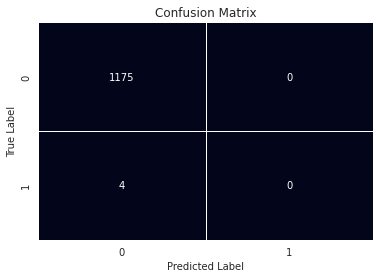

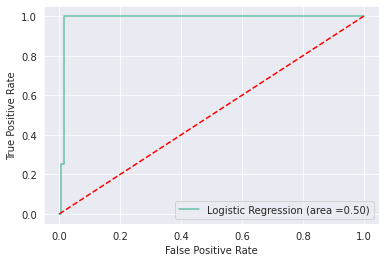

In [ ]:
# Basic Logit Model Method

#Set 'expired' as target
target = 'Expired'
X = df_scaled.drop(target, axis = 1)
y = df_scaled[target]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

#Train model and add other necessary score
clf = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)
evaluate_model(X_train, y_train, clf)

The test score yielded a high value of 99.6607% and a cross validation score of 99.6604%. However, the model also resulted to a negative standard deviation, which is statistically impossible. Even if the test score and the cross validation score yielded a promising value, other indicators have contradicted the validity of the score. This leads to a risk of misinterpreting the data given that other outliers also exist.

### SMOTE Method
Recall that on the pre-processing stage, it was determined that the number of those who were funded and not funded are imbalanced. This kind of outlier in the dataset might affect the scores when conducting the basic logit method. However, accuracy may not be a good measure in evaluating the model with an imbalanced data (Sokolova, 2006). Thus we present another method to do the logit regression, the **Synthethic Minority Over-sampling Technique (SMOTE)**

<br>The SMOTE Technique is an approach to construct classifiers if the dataset is imbalanced (Chawla et al., 2002). It is an oversampling method to generate a synthetic data of the minority class (ie. `Expired`) rather than duplicating the data.  This can provide better insights of the scores yielded as the dataset could be balanced with SMOTE. The estimation of the scores for logit regression using the SMOTE method is summarized below. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The l

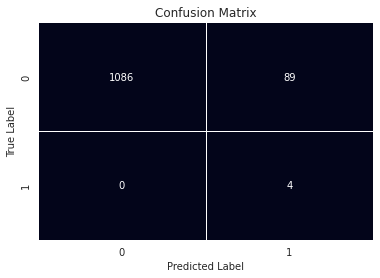

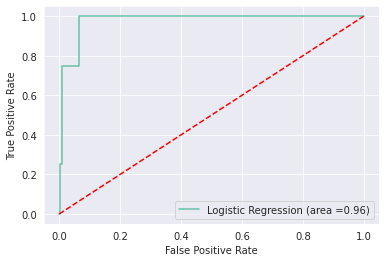

In [ ]:
# SMOTE Method 
smt = SMOTE(random_state=0)

# Fit resample
X_train_SMOTE, y_train_SMOTE = smt.fit_resample(X_train, y_train)

# Evaluate model with necessary scores
evaluate_model(X_train_SMOTE, y_train_SMOTE, clf)

The results of the SMOTE method may have yielded a lower test and cross validation scores. It is also evident that the standard deviation is already positive, which means that the spread of the values make more sense. Moreover, this method have also distributed the imbalanced data evident in the confusion matrix and a smoother curve in the ROC curve

The results of the model can be visualized through the Confusion Matrix. Based on the Confusion Matrix, it shows that with this method the model was able to accurately predict that 1086 loans that would be funded. However, an additional 89 loans that the model predicted would be fully funded were actually not fully funded (type 1 error). Meanwhile the model was also able to accurately predict 4 loans that would not recieve full funding, additionally none of the loans predicted not to receive full funding were fully funded (type 2 error). Another way to visualize the results is through the Receiver Operating Characteristics (ROC) curve. The ROC curve is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis). The green curve indicates the model's performance while the red dotted line is the random classifier. Generally, skilful models are represented by curves that bow up to the top left of the plot. This ROC curve therefore indicates that the model is skilled in accurately determining which loans would be fully funded.

### SMOTE Method with Pipeline
Even if the SMOTE method could handle imbalanced datasets such as in Kiva Loans, we also implemented a pipeline of the SMOTE. For this method, it will optimize the values to gain better intuition on how our model performed (Foley, 2020).

/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Line

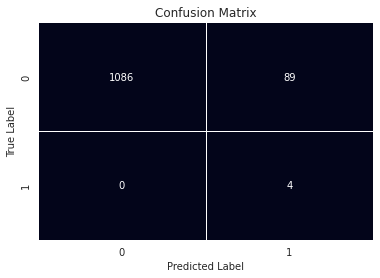

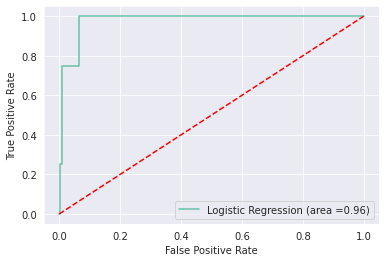

In [ ]:
# Implement a pipeline to optimize values
pipeline = make_pipeline(smt, clf)
evaluate_model(X_train, y_train, pipeline)

From the results of the above two SMOTE methods, we are able to see a difference between the cross-validation scores of the two methods. A lower score in the SMOTE pipeline method is observed compared to the plain SMOTE method. However, implementing a pipeline resulted in a cross-validation score that is slightly closer to the test score compare to the first SMOTE method. This indicates that the accuracy of the model is matched for both scores Moreover, the standard deviation is lower in the SMOTE method with the pipeline, which indicates that the spread of the values are closer.

<br>Both the Confusion Matrix and the ROC curve results of the SMOTE pipeline method are similar compared to the results yielded by the plain SMOTE method. The confusion Matrix similarly shows that the model accurately predicted 1086 loans would be fully funded while 89 of the loans predicted to be fully funded were not (at type 1 error). Additionally 4 loans were also accurately predicted not to receive full funding while none of the loans predicted not receive full funding were fully funded (type 2 error) both similar to the results of the plain SMOTE method. Lastly, the ROC curve of the SMOTE pipeline method is similar to that of the plain SMOTE method wherein it bows up to the top left of the plot indicating that the model is skilled in determining the likelihood of loans being funded.

### Final Say: What factors are relvant in increasing the likelihood of receiving loans?
Aside from the scores obtained and model optimization implemented in this project, we determine which factors in the data increases the likelihood of receiving loans. In addition to this, we also get the factors that lessens the chance of getting funded. This is determined by getting the coefficients of the logit regression.

In [ ]:
# List the variables and the coefficients
coeff = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf.coef_[0]})
coeff.head(27)

,Feature,Coefficients
0,Unnamed: 0,0.001541
1,Loan Amount,9.760281
2,Loan Length,0.898502
3,Partner Time With Kiva,-3.554700
4,Borrower Average Cost,7.742410
5,Partner Delinquency Rate,3.948599
6,Partner Default Rate,4.245648
7,Profitability Rate,-3.574191
8,Kenya,-3.217736
9,Philippines,-4.400256


The plot of the top 5 and bottom 5 factors are arranged in descending order and are summarized below:

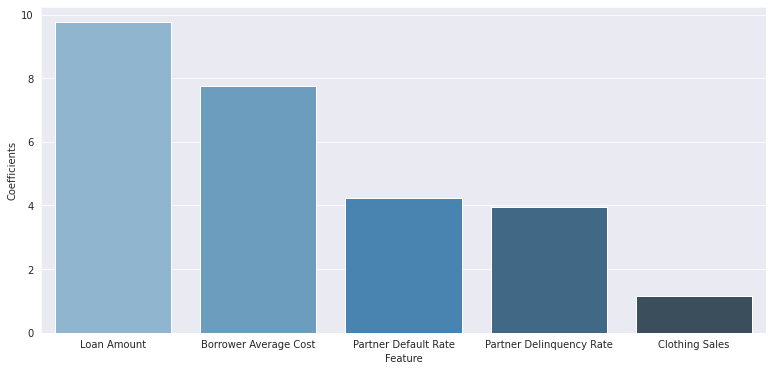

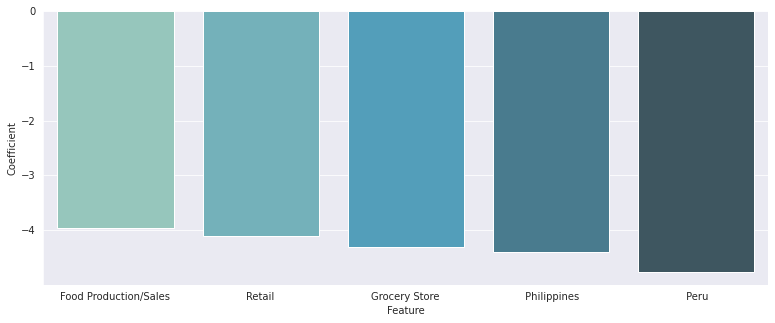

In [ ]:
#Visualize coefficients (Top 5 and Bottom 5)
logreg_coeff = coeff.sort_values('Coefficients', ascending = False)
top = logreg_coeff.head(5)
bot = logreg_coeff.tail(5)

#Plot top 5 factors that increases the chances of getting a loan
plt.figure().set_size_inches(13, 6)
top5 = sns.barplot(x='Feature', y='Coefficients',data=top, palette="Blues_d")

# Plot bottom 5 decreases the chances of getting a loan
plt.figure().set_size_inches(13,10)
bot5 = sns.barplot(x='Feature', y='Coefficients',data=bot, palette="GnBu_d")
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.5)

The graph above shows ten factors in the Logit Model that influence the chances of getting funded on Kiva. The top graph presents factors that *increases the likelihood* of getting funded. While the lowermost graph presents factors that *decreases the likelihood* of borrowers getting funded.

Each factor that increases the likelihood of getting funded are explained in full details:

* **Loan Amount** - An increase in the loan amount increases the chances of getting funded.This may be due to the fact that the loan amount is the most important information for lenders to calculate their investment or loan.
* **Borrower Average Cost** - The cost of the borrower's enterprise is likely to be one of the most considered factor of lenders to fund their enterprise. This may imply that the average cost is an important factor to consider for lenders to calculate the risk in their investment or loan.
* **Partner default Rate** - A percentage increase of the total outstanding loans of the borrower, increases the chances of getting funded.
* **Partner Delqiuency Rate** - A percentage increase of the loan payment that are overdue by the partner organization increases the chances of getting funded. For the default and the deliquency rate, although the terms are quite negative, these rates are not particularly focused by lenders. The lenders may thought that lending in Kiva is 'charitable' or 'altruistic' in nature, where they could lend out of empathy to donate and help these enterprises. Perhaps the model predicted that lenders are not too technical in checking the default rate to calculate the risk.
* **Clothing Sales** - If the enterprise belong to the clothing industry, then it increases the chances of getting funded

On the otherhand, there are also factors that decreases the likelihood of getting funded, which is explained in the following details:
* **Food production, Retail, and Grocery Store** - If the enterprise belong to one of these sectors, this decreases their chances of getting funded. Market evaluation (ie. profitability, risk, and opportunity) is needed to explain why this phenomena happens.
* **Philippines & Peru** - Surprisingly, residing in these countries decreases the chances of getting funded. We notice that enterprises in these countries are generally found in rural areas that do not have much access to resources or market outreach. This may have something to do with the general characteristics of borrowers or economic conditions (ie. ease of doing business and economic climate) found in the country.  

## Conclusion

In conducting the logit regression for this project, the results obtained using basic logit method proved not to be a good measure given that the model resulted to have a negative standard deviation which is statistically impossible and contradicts the validity of the scores. This was caused by the imbalance in the data wherein the number of funded and not funded loans were not balanced, outliers such as this in the dataset could affect the scores while doing the basic logit method. Given the imbalance in the data, the SMOTE method was the used to conduct the logit regression. The SMOTE technique is an approach to construct classifiers if the dataset is imbalanced. The results obtained using the SMOTE method yielded lower test and cross validation scores as well as a positive standard deviation indicating that the spread of the values makes more sense. The confusion matrix shows that the model was able to accurately predict that 1086 loans would be funded and that 4 loans would not be fully funded. It also shows that the model only had 89 type 1 errors and 0 type 2 errors. Additionally the ROC curve bows up to the top left of the plot indicating that the model is skilled in accurately determining loans that would be fully funded. In order to optimize the values and gain better intuition of how our model performed a pipeline of the SMOTE was implemented. The results of this showed a lower cross-validation score compared to the plain SMOTE method however it was closer to the test score indicating accuracy of the model is matched for both scores. It also had a lower standard deviation meaning the spread of the values are closer. Both the confusion matrix and ROC curve were similar to that of the plain SMOTE method. These indicate that the model is skilled in determining the likelihood of loans being funded.

Lastly, using the coefficients of the logit regression the factors in the data that increases and decreases the likelihood of loans getting funded were determined. The factors that were determined to increase the likelihood of loans getting funded were loan amount, borrower average cost, partner default rate, partner delinquency rate, and clothing sales. On the other hand the factors that were determined to decrease the likelihood of loans getting funded were the enterprise sectors of food production, retail, and grocery store as well as the countries of the Philippines and Peru.

## Recommendation for future projects
1. Provide a threshold analysis for the amount of loans that is suitable for enterprises to grow. 
2. Collect more data in order to have a balanced dataset of funded and not fully funded loans.
3. Given the flexibility of the data on the Kiva platform, future projects can also explore other aspects such as creating recommender systems to match potential lenders and borrowers.

## Reference

Brau, J. & Woller, G. (2004). Microfinance: A comprehensive review of the existing literature. Journal of Entrepreneurial Finance, JEF, ISSN 1551-9570, The Academy of Entrepreneurial Finance (AEF), Montrose, CA, Vol. 9, Iss. 1, pp. 1-27

Chawla, N., Bowyer, K., Hall, L., Kegelmeyer, W. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research 16 (2002) 321–357


Foley, D. (2020). Dealing with Class Imbalances in Machine Learning. Retrieved from https://towardsdatascience.com/machine-learning-and-class-imbalances-eacb296e776f


Serrano-Cinca C, Gutiérrez-Nieto B, LópezPalacios L (2015) Determinants of Default in P2P Lending. PLoS ONE 10(10): e0139427. doi:10.1371/ journal.pone.0139427

Sokolova, M. (2006). Beyond Accuracy, F-Score and ROC: A Family of Discriminant Measures for Performance Evaluation. Advances in Artificial Intelligence Vol. 4304:1015-1021

Djurovic, Andrija. (2017). Estimating Probability of Default on Peer to Peer Market – Survival Analysis Approach. Journal of Central Banking Theory and Practice. 6. 149-167. 10.1515/jcbtp-2017-0017. 

LEE, J. (2020). "Prediction of Default Risk in Peer-to-Peer Lending Using Structured and Unstructured Data". Journal of Financial Counseling and Planning, Volume 31, Number 1, 2020, 115-129 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f786ac79-00fd-45ac-a60e-4e2db0695d4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>